In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
path = ('/content/iris.csv')
data = pd.read_csv(path, header=None)
print("Shape : ", data.shape)
print("Is there any null values ? " ,data.isnull().values.any())
data.head()

Shape :  (150, 5)
Is there any null values ?  False


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Length of sepal vs Species')

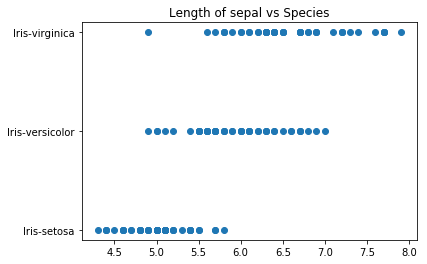

In [ ]:
plt.scatter(data[0],data[4])
plt.title("Length of sepal vs Species")

In [ ]:
x = data[[0,1,2,3]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
print(data[4].value_counts())
y= data[4]

print(y[0:5])

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.3, random_state=1)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [ ]:
km = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [ ]:
km.fit(xtrain,ytrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means_labels = km.labels_
k_means_labels

array([2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1], dtype=int32)

In [ ]:
k_means_cluster_centers = km.cluster_centers_
k_means_cluster_centers

array([[5.89047619, 2.73809524, 4.38333333, 1.43333333],
       [4.94166667, 3.33888889, 1.47222222, 0.23055556],
       [6.8037037 , 3.08518519, 5.75925926, 2.08888889]])

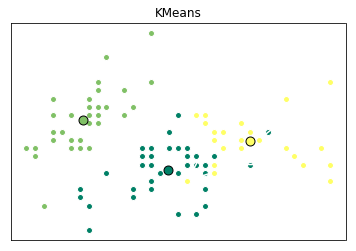

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.summer(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(xtrain[my_members, 0], xtrain[my_members, 1], 'w', markerfacecolor=col, marker='o')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=9)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
